In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE

#import per la valutazione dei modelli, creazione train test split e cross validation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split,cross_val_score

#modelli ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE

#LISTA UTILE PER IMPORT DEI MODELLI

#feature selection and data processing
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler, OrdinalEncoder
from sklearn.preprocessing import RobustScaler #when you have many outliers

#classification
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#regression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge #least squares
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

#CV STRATIFICATA

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#CROSS VALIDATE (diversa da cross_val_score)
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion

from sklearn.impute import SimpleImputer #rimuove gli NaN

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler #when you have many outliers

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE

from sklearn.pipeline import make_pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import FunctionTransformer

#RANDOM SEARCH PER IPERPARAMETRI

from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

#ESEMPIO GRID SEARCH DI IPERPARAMETRI PER IL MODELLO KNN

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve, validation_curve
from scipy.stats import uniform

from sklearn.utils import resample

from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer


In [14]:
df = pd.read_csv('dataset.csv')
df

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,Pear,NaN,F,VS2,1.02,1.54,62.9,63.0,Excellent,Very Good,Thick to Very Thick,NaN,8.60,5.59,3.51,3760,GIA,Medium
6481,Heart,NaN,E,VVS2,1.00,1.16,58.3,59.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,6.05,6.99,4.07,4710,GIA,Strong
6482,Princess,Ideal,G,VVS1,1.03,1.01,72.6,71.0,Excellent,Excellent,Medium to Slightly Thick,NaN,5.59,5.51,4.00,3270,GIA,NaN
6483,Radiant,NaN,E,VS1,1.06,1.43,67.8,62.0,Excellent,Excellent,Slightly Thick to Thick,NaN,7.24,5.05,3.42,1050,GIA Lab-Grown,NaN


In [15]:
print(df.shape[0])
print(df.isnull().sum().sum())
print(df['Type'].value_counts())

6485
14332
Type
GIA              3355
IGI Lab-Grown    1876
GIA Lab-Grown    1254
Name: count, dtype: int64


In [16]:
df['Volume'] = df['Width']*df['Length']*df['Height']
df

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence,Volume
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN,225.189035
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN,206.754864
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN,191.925600
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint,171.302625
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN,120.190000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,Pear,NaN,F,VS2,1.02,1.54,62.9,63.0,Excellent,Very Good,Thick to Very Thick,NaN,8.60,5.59,3.51,3760,GIA,Medium,168.739740
6481,Heart,NaN,E,VVS2,1.00,1.16,58.3,59.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,6.05,6.99,4.07,4710,GIA,Strong,172.118265
6482,Princess,Ideal,G,VVS1,1.03,1.01,72.6,71.0,Excellent,Excellent,Medium to Slightly Thick,NaN,5.59,5.51,4.00,3270,GIA,NaN,123.203600
6483,Radiant,NaN,E,VS1,1.06,1.43,67.8,62.0,Excellent,Excellent,Slightly Thick to Thick,NaN,7.24,5.05,3.42,1050,GIA Lab-Grown,NaN,125.042040


Correlazione tra Volume e Prezzo: 0.3971


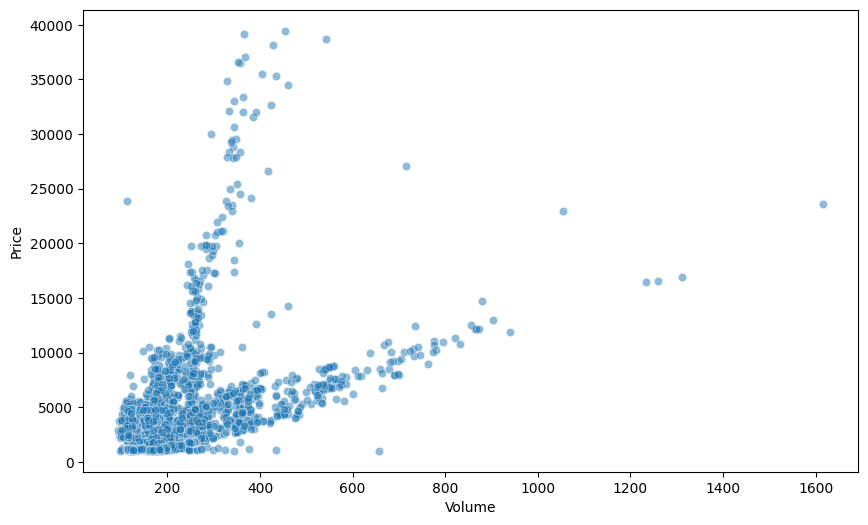

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Volume', y='Price', alpha=0.5)

correlazione = df['Volume'].corr(df['Price'])
print(f"Correlazione tra Volume e Prezzo: {correlazione:.4f}")


3. Considerare soltanto i record con valore non nullo di Cut e discretizzare la variabile Carat
Weight in 5 gruppi. Verificare attraverso una tabella pivot se è vero che il prezzo medio
aumenta all'aumentare della qualità del taglio e del peso in carati. (punti 3)

In [18]:
print(df['Cut'].value_counts())
print(df.shape[0])

Cut
Ideal        1310
Excellent     606
Very Good     258
Astor           8
Name: count, dtype: int64
6485


In [19]:
df1 = df.copy()
df1.dropna(subset=['Cut'], inplace = True)
df1['Cut']

,Cut
0,Ideal
11,Very Good
14,Ideal
15,Ideal
19,Ideal
...,...
6468,Ideal
6469,Ideal
6475,Excellent
6479,Excellent


In [20]:
df1['Carat Weight'] = pd.cut(df1['Carat Weight'], bins = 5)
df1['Carat Weight'].value_counts()

,count
Carat Weight,
"(0.997, 1.606]",1900
"(1.606, 2.212]",151
"(2.212, 2.818]",84
"(2.818, 3.424]",38
"(3.424, 4.03]",9


In [21]:
ordine_taglio = ['Very Good', 'Excellent', 'Ideal', 'Astor']
df1['Cut'] = pd.Categorical(df1['Cut'], categories=ordine_taglio, ordered=True)
pivot = df1.pivot_table(index=['Cut'], columns= ['Carat Weight'], values='Price', aggfunc='mean')
print(pivot)

Carat Weight  (0.997, 1.606]  (1.606, 2.212]  (2.212, 2.818]  (2.818, 3.424]  \
Cut                                                                            
Very Good        3379.922481             NaN             NaN             NaN   
Excellent        2897.374172     2495.000000             NaN             NaN   
Ideal            2299.019417     3803.489933     5288.571429     6523.947368   
Astor            5348.750000             NaN             NaN             NaN   

Carat Weight  (3.424, 4.03]  
Cut                          
Very Good               NaN  
Excellent               NaN  
Ideal           6917.777778  
Astor                   NaN  


/tmp/ipython-input-2197152327.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df1.pivot_table(index=['Cut'], columns= ['Carat Weight'], values='Price', aggfunc='mean')


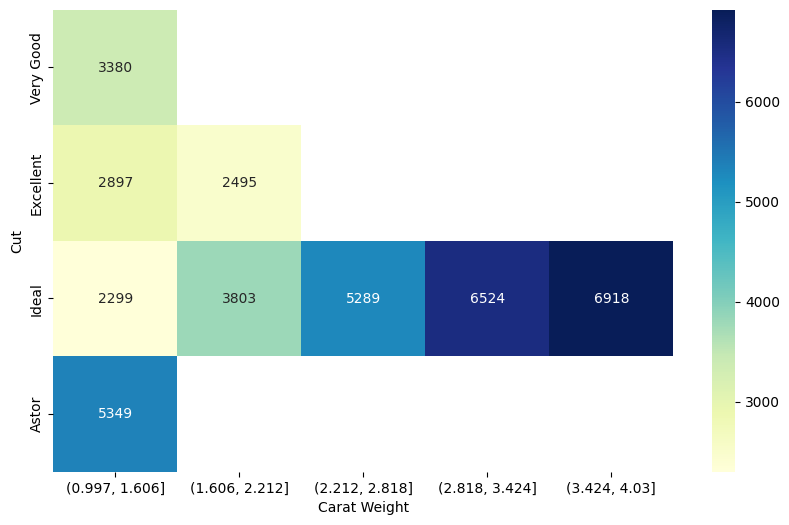

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.show()

Aumenta con il tipo di taglio e con il peso, ma non in modo lineare, infatti ideal per il primo taglio di peso costa meno di excellent, che a sua volta costa meno di very good

4. Si vuole analizzare il prezzo a carato per ogni tipo di diamante: creare una nuova feature che
rappresenta il prezzo per carato (Price / Carat Weight) e visualizzare attraverso dei boxplot
come varia questo prezzo per ogni tipo (Type) di diamante (punti 4)

<Axes: xlabel='Type', ylabel='PriceC'>

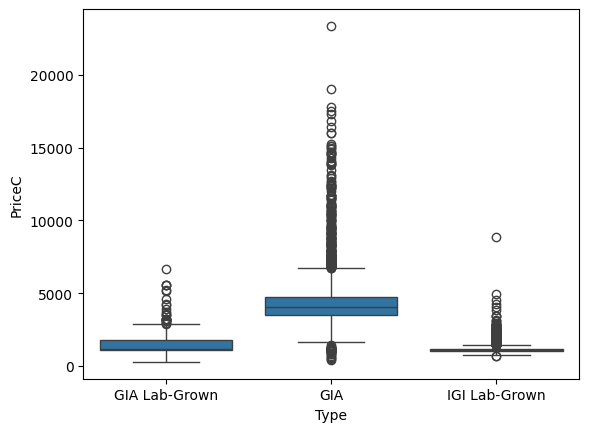

In [23]:
df['PriceC'] = df['Price']/df['Carat Weight']
sns.boxplot(data = df, x='Type', y='PriceC')

# 2
1. Si vuole predire la tipologia di diamante (Type). Ricaricare il dataset originale, eliminare
eventuali attributi inutili (giustificare la scelta), eliminare gli attributi con più del 50% di valori
nulli, eliminare le istanze che contengono valori nulli, trasformare opportunamente valori
categorici e dividere il dataset in modo che 3/4 degli elementi siano contenuti in un nuovo
dataset “train” e 1/4 nel dataset “test” preservando le proporzioni delle classi nella colonna
target.
Confrontare la predizione ottenuta sia sul dataset train sia sul dataset test dai classificatori
DecisionTree, KNeighborsClassifier e da un dummy classifier a scelta. Effettuare alcune
considerazioni sui risultati ottenuti, tenendo in considerazione i valori di F1 (con average=
“weighted”) e della confusion matrix. (punti 4)

In [24]:
df = pd.read_csv('dataset.csv')
df

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,Pear,NaN,F,VS2,1.02,1.54,62.9,63.0,Excellent,Very Good,Thick to Very Thick,NaN,8.60,5.59,3.51,3760,GIA,Medium
6481,Heart,NaN,E,VVS2,1.00,1.16,58.3,59.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,6.05,6.99,4.07,4710,GIA,Strong
6482,Princess,Ideal,G,VVS1,1.03,1.01,72.6,71.0,Excellent,Excellent,Medium to Slightly Thick,NaN,5.59,5.51,4.00,3270,GIA,NaN
6483,Radiant,NaN,E,VS1,1.06,1.43,67.8,62.0,Excellent,Excellent,Slightly Thick to Thick,NaN,7.24,5.05,3.42,1050,GIA Lab-Grown,NaN


In [25]:
df1 = df.copy()
df1

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,Pear,NaN,F,VS2,1.02,1.54,62.9,63.0,Excellent,Very Good,Thick to Very Thick,NaN,8.60,5.59,3.51,3760,GIA,Medium
6481,Heart,NaN,E,VVS2,1.00,1.16,58.3,59.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,6.05,6.99,4.07,4710,GIA,Strong
6482,Princess,Ideal,G,VVS1,1.03,1.01,72.6,71.0,Excellent,Excellent,Medium to Slightly Thick,NaN,5.59,5.51,4.00,3270,GIA,NaN
6483,Radiant,NaN,E,VS1,1.06,1.43,67.8,62.0,Excellent,Excellent,Slightly Thick to Thick,NaN,7.24,5.05,3.42,1050,GIA Lab-Grown,NaN


In [26]:
df1.dropna(thresh=df.shape[0]/2, axis=1, inplace = True)
df1.dropna(inplace=True)

In [27]:
categorical_cols = []

for c in df1.columns:
  if df1[c].dtype in ['object']:
    categorical_cols.append(c)

print(f'{categorical_cols}, e sono {len(categorical_cols)}')

['Shape', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Girdle', 'Type'], e sono 7


In [28]:
le = LabelEncoder()

for c in categorical_cols:
  df1[c] = le.fit_transform(df1[c])

df1

,Shape,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Length,Width,Height,Price,Type
0,1,2,5,1.84,1.02,65.8,59.0,0,2,7,7.09,6.95,4.57,2640,1
1,6,1,2,1.20,1.65,62.5,58.0,2,2,7,9.64,5.86,3.66,1070,1
2,5,1,2,1.19,1.41,63.1,63.0,2,2,7,8.44,6.00,3.79,1070,1
3,3,0,1,1.00,1.18,61.7,58.0,0,0,13,5.85,6.89,4.25,7110,0
4,8,4,2,1.01,1.35,69.4,66.0,0,2,14,6.80,5.05,3.50,3050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,6,2,3,1.02,1.54,62.9,63.0,0,2,16,8.60,5.59,3.51,3760,0
6481,3,1,5,1.00,1.16,58.3,59.0,0,0,13,6.05,6.99,4.07,4710,0
6482,7,3,4,1.03,1.01,72.6,71.0,0,0,6,5.59,5.51,4.00,3270,0
6483,8,1,2,1.06,1.43,67.8,62.0,0,0,12,7.24,5.05,3.42,1050,1


In [29]:
X = df1.drop('Type', axis = 1)
y = df1['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify = y)


In [30]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
acc_dt_train = accuracy_score(y_pred, y_train)
y_pred = model.predict(X_test)
acc_dt_test = accuracy_score(y_pred, y_test)
print(f'Per il decision TREE: Train {acc_dt_train}, Test {acc_dt_test}')
print(confusion_matrix(y_pred, y_test))
print(f1_score(y_pred, y_test, average='weighted'))

Per il decision TREE: Train 1.0, Test 0.9273008507347255
[[663   5   3]
 [  6 216  51]
 [  0  29 320]]
0.9268550574634431


In [31]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
acc_kn_train = accuracy_score(y_pred, y_train)
y_pred = model.predict(X_test)
acc_kn_test = accuracy_score(y_pred, y_test)
print(f'Per il KNN: Train {acc_kn_train}, Test {acc_kn_test}')
print(confusion_matrix(y_pred, y_test))
print(f1_score(y_pred, y_test, average='weighted'))


Per il KNN: Train 0.8638297872340426, Test 0.811291569992266
[[642  75  51]
 [ 19 119  35]
 [  8  56 288]]
0.8219956951526636


In [32]:
model = DummyClassifier(strategy = 'stratified')
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
acc_dum_train = accuracy_score(y_pred, y_train)
y_pred = model.predict(X_test)
acc_dum_test = accuracy_score(y_pred, y_test)
print(f'Per il Dummy: Train {acc_dum_train}, Test {acc_dum_test}')

Per il Dummy: Train 0.39052224371373306, Test 0.3890177880897138


DT ha overfitting, il KNN meno.
Il KNN fa molta confusione sulla classe centrale

2. Confrontare i valori di F1 ottenuti nel punto precedente con quelli che si ottengono con una
10 Fold cross validation. (punti 1)

In [33]:
cross = cross_val_score(DecisionTreeClassifier(), X, y, cv = 10)
print(f'Per il DT: {cross}, di media {cross.mean()}, rispetto a prima: {cross.mean()-acc_dt_test}')

cross = cross_val_score(KNeighborsClassifier(), X, y, cv = 10)
print(f'Per il KNN: {cross}, di media {cross.mean()}, rispetto a prima: {cross.mean()-acc_kn_test}')

Per il DT: [0.93199382 0.93353941 0.92890263 0.92569659 0.90712074 0.93343653
 0.94427245 0.94117647 0.93653251 0.9380805 ], di media 0.932075164727894, rispetto a prima: 0.004774313993168522
Per il KNN: [0.81761978 0.83153014 0.82843895 0.82198142 0.7879257  0.83126935
 0.8374613  0.80804954 0.81888545 0.83436533], di media 0.8217526952210965, rispetto a prima: 0.01046112522883047


3. Attraverso la tecnica Permutation Feature Importance (PFI) e considerando il classificatore
KNeighborsClassifier, analizzare la feature importance del dataset utilizzato al punto 1.
Applicare 5 permutazioni per ogni feature. Quali risultano essere le 2 feature più importanti?
(punti 4)

In [34]:
from sklearn.inspection import permutation_importance
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pfi_result = permutation_importance(
    knn,
    X_test,       # Si calcola sul Test Set per valutare la generalizzazione
    y_test,
    n_repeats=5,
    random_state=42,
    n_jobs=-1     # Usa tutti i processori per fare prima
)

importances = pd.Series(pfi_result.importances_mean, index=X_test.columns)
sorted_importances = importances.sort_values(ascending=False)
print(sorted_importances)
print(f"Le 2 feature più importanti sono: {sorted_importances.index[0]} e {sorted_importances.index[1]}")

Price                 0.374787
Girdle                0.068523
Depth %               0.013612
Table %               0.007579
Symmetry              0.004950
Color                 0.002784
Clarity               0.002011
Shape                 0.001856
Length                0.001701
Height                0.001237
Width                 0.000928
Polish                0.000309
Carat Weight          0.000155
Length/Width Ratio    0.000000
dtype: float64
Le 2 feature più importanti sono: Price e Girdle


4. A partire dal dataset utilizzato al punto 1, trovare i valori migliori dei parametri weights e
n
neighbors del classificatore KNeighborsClassifier. Come varia il valore di F1? (punti 2)
_

In [35]:
params = {
    'weights': ['uniform', 'distance'],
    'n_neighbors' : [3, 4, 5, 6, 7],
}
gs = GridSearchCV(knn, params, scoring='f1_weighted')
gs.fit(X_train, y_train)
knn_best = gs.best_params_

y_pred = gs.predict(X_test)
grid_kbest_acc_train = gs.best_score_
grid_kbest_acc = accuracy_score(y_test, y_pred)
grid_kbest_f1 = f1_score(y_test, y_pred, average='weighted')
print(f' Best params: {gs.best_params_}, con score f1: {grid_kbest_f1}, e acc: {grid_kbest_acc}')


 Best params: {'n_neighbors': 3, 'weights': 'uniform'}, con score f1: 0.812121721118139, e acc: 0.8190255220417634


5. Creare una pipeline in cui, a partire dal dataset utilizzato al punto precedente, i valori degli
attributi Length, Width, Height sono discretizzati in 5 intervalli, la variabile Price è scalata
nell'intervallo 0-1 e tutti gli altri attributi sono lasciati invariati. Applicare il KNeighborsClassifier
con i valori migliori dei parametri analizzati nel punto precedente e confrontare i risultati.
(punti 3)

In [38]:
preprocessing = ColumnTransformer (
    transformers = [
    ('disc', KBinsDiscretizer(n_bins=5, encode='ordinal'), ['Length', 'Width', 'Height']),
    ('scale', MinMaxScaler(), ['Price']), ]
  , remainder = 'passthrough')
model = KNeighborsClassifier(**knn_best)

pipe = Pipeline (
    steps=[
        ('preprocessing', preprocessing),
        ('model', model)
    ]
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
acc_pipe = accuracy_score(y_pred, y_test)
print(acc_pipe)

0.8778035576179428


6. Creare una pipeline che, a partire dal dataset iniziale a cui sono stati rimossi gli attributi con
più del 50% di valori nulli, trasforma le colonne testuali in valori numerici, applica il
SimpleImputer per sostituire i valori nulli, trasforma tutte le feature attraverso lo Standard
Scaler e applica il KNeighborsClassifier. (punti 3)

In [63]:
df = pd.read_csv('dataset.csv')
df1 = df.copy()
df1.dropna(thresh=df.shape[0]/2, axis=1, inplace = True)
X = df1.drop('Type', axis = 1)
y = le.fit_transform(df1['Type'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify = y)

print(categorical_cols)

['Shape', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Girdle']


In [65]:

preprocessing_2 = ColumnTransformer(
    transformers= [
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ], remainder = 'passthrough'
)

pipe_2 = Pipeline(
    steps = [
        ('preprocessing2', preprocessing_2),
        ('Simple', SimpleImputer(strategy='mean')),
        ('scale', StandardScaler()),
        ('model', model)
    ]
)
pipe_2.fit(X_train, y_train)
y_pred = pipe_2.predict(X_test)
acc_pipe2 = accuracy_score(y_pred, y_test)
print(acc_pipe2)

0.9259830377794911


7. Aggiungere alla pipeline del punto precedente (dopo lo Standard Scaler) la decomposizione
TruncatedSVD. Valutare il valore migliore per il numero di componenti di TruncatedSVD tra 2, 4 e
6 e i valori migliori di n
_
neighbors e weights del KNeighborsClassifier. (punti 3

In [69]:
from sklearn.decomposition import TruncatedSVD

pipe_3 = Pipeline(
    steps = [
        ('preprocessing2', preprocessing_2),
        ('Simple', SimpleImputer(strategy='mean')),
        ('scale', StandardScaler()),
        ('TruncatedSVD', TruncatedSVD()),
        ('model', model)
    ]
)

grid = {
    'TruncatedSVD__n_components' : [2, 4, 6],
    'model__n_neighbors' : [4, 5, 6],
    'model__weights' : ['uniform', 'distance']
}
gs = GridSearchCV(pipe_3, grid, cv = 5, scoring='f1_weighted')
gs.fit(X_train, y_train)
knn_best = gs.best_params_

y_pred = gs.predict(X_test)
grid_kbest_acc_train = gs.best_score_
grid_kbest_acc = accuracy_score(y_test, y_pred)
grid_kbest_f1 = f1_score(y_test, y_pred, average='weighted')
print(f' Best params: {gs.best_params_}, con score f1: {grid_kbest_f1}, e acc: {grid_kbest_acc}')


 Best params: {'TruncatedSVD__n_components': 6, 'model__n_neighbors': 5, 'model__weights': 'distance'}, con score f1: 0.8907691245978876, e acc: 0.8912875867386276
